ANALISIS DE DATOS

Carga de librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Fontconfig warning: ignoring UTF-8: not a valid region tag
Matplotlib is building the font cache; this may take a moment.


carga del fichero

In [4]:
# Cargar el dataset
url = 'https://raw.githubusercontent.com/annaalfaro/TFM/main/SalesOrder.csv'
sales_order = pd.read_csv(url)

Distribución de la cantidad solicitada (SO_Quantity)

In [5]:
# Descripción estadística de la cantidad solicitada
quantity_stats = sales_order['SO_Quantity'].describe()
print(quantity_stats)

count    416.000000
mean     114.427885
std       12.337604
min       90.000000
25%      106.000000
50%      113.000000
75%      124.000000
max      144.000000
Name: SO_Quantity, dtype: float64


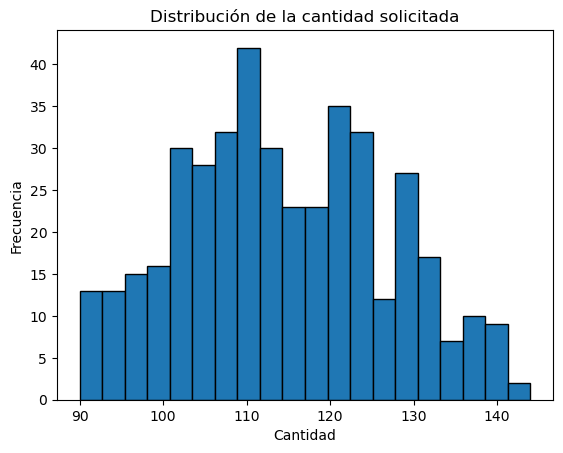

In [6]:
# Histograma de la cantidad solicitada
plt.hist(sales_order['SO_Quantity'], bins=20, edgecolor='black')
plt.title('Distribución de la cantidad solicitada')
plt.xlabel('Cantidad')
plt.ylabel('Frecuencia')
plt.show()

Frecuencia de órdenes por cliente (SO_Client)

In [7]:
# Conteo de órdenes por cliente
orders_per_client = sales_order['SO_Client'].value_counts()
print(orders_per_client.head())

CL001    204
CL005     77
CL002     76
CL004     59
Name: SO_Client, dtype: int64


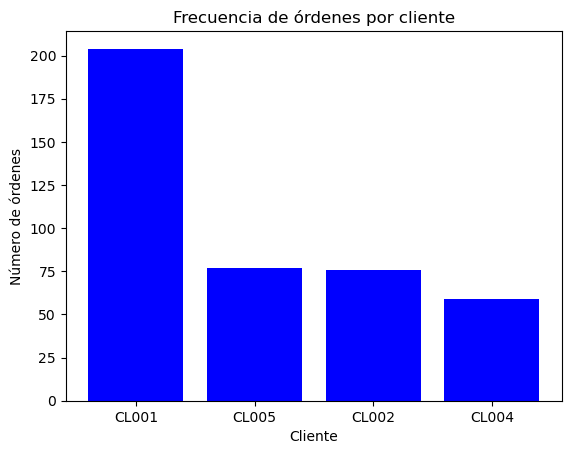

In [17]:
# Gráfico de barras de las órdenes por cliente
plt.bar(orders_per_client.index, orders_per_client.values, color='blue')  
plt.title('Frecuencia de órdenes por cliente')
plt.xlabel('Cliente')
plt.ylabel('Número de órdenes')
plt.xticks(rotation=0) 
plt.show()

Frecuencia de productos solicitados (SO_CustomerItemid)

In [9]:
# Conteo de productos solicitados
product_counts = sales_order['SO_CustomerItemid'].value_counts()
print(product_counts.head())


CI003    76
CI010    59
CI002    42
CI005    42
CI001    41
Name: SO_CustomerItemid, dtype: int64


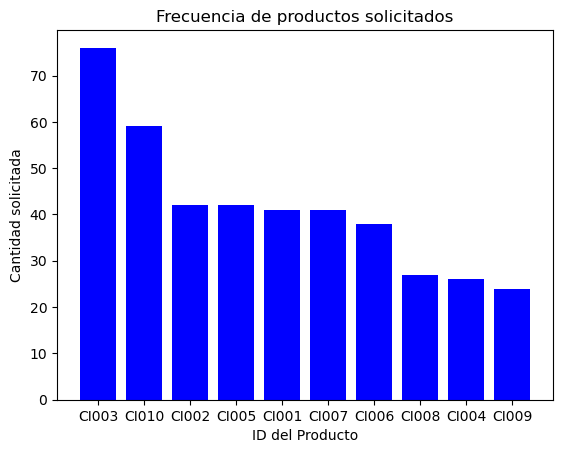

In [18]:
# Gráfico de barras de los productos más solicitados
plt.bar(product_counts.index, product_counts.values, color='blue')
plt.title('Frecuencia de productos solicitados')
plt.xlabel('ID del Producto')
plt.ylabel('Cantidad solicitada')
plt.xticks(rotation=0)
plt.show()

Relación entre cantidad solicitada y cliente/producto

In [11]:
# Promedio de cantidad solicitada por cliente
avg_quantity_per_client = sales_order.groupby('SO_Client')['SO_Quantity'].mean()
print(avg_quantity_per_client.head())

# Promedio de cantidad solicitada por producto
avg_quantity_per_product = sales_order.groupby('SO_CustomerItemid')['SO_Quantity'].mean()
print(avg_quantity_per_product.head())


SO_Client
CL001    114.637255
CL002    114.144737
CL004    113.372881
CL005    114.961039
Name: SO_Quantity, dtype: float64
SO_CustomerItemid
CI001    113.195122
CI002    116.571429
CI003    114.144737
CI004    117.538462
CI005    115.952381
Name: SO_Quantity, dtype: float64


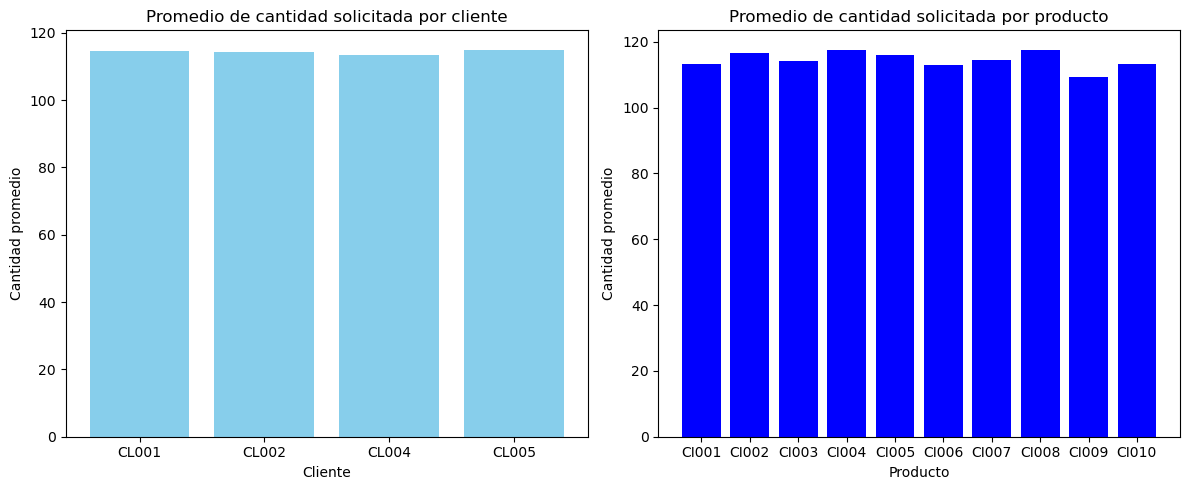

In [20]:
# Crear la figura y los ejes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de barras para la cantidad solicitada por cliente
ax1.bar(avg_quantity_per_client.index, avg_quantity_per_client.values, color='skyblue')
ax1.set_title('Promedio de cantidad solicitada por cliente')
ax1.set_xlabel('Cliente')
ax1.set_ylabel('Cantidad promedio')
ax1.set_xticks(range(len(avg_quantity_per_client.index)))
ax1.set_xticklabels(avg_quantity_per_client.index)

# Gráfico de barras para la cantidad solicitada por producto
ax2.bar(avg_quantity_per_product.index, avg_quantity_per_product.values, color='blue')
ax2.set_title('Promedio de cantidad solicitada por producto')
ax2.set_xlabel('Producto')
ax2.set_ylabel('Cantidad promedio')
ax2.set_xticks(range(len(avg_quantity_per_product.index)))
ax2.set_xticklabels(avg_quantity_per_product.index)

# Mostrar los gráficos
plt.tight_layout()
plt.show()

Meses con más demandas recibidas

In [23]:
# Asegurarse de que la columna SO_Date esté en formato datetime
sales_order['SO_Date'] = pd.to_datetime(sales_order['SO_Date'])  

# Extraer el mes de la columna SO_Date
sales_order['Order_Month'] = sales_order['SO_Date'].dt.month

# Contar el número de pedidos por mes
orders_per_month = sales_order['Order_Month'].value_counts().sort_index()

# Nombres de los meses en español
month_names = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

# Reemplazar los números de los meses por sus nombres en el valor numérico
orders_per_month.index = orders_per_month.index.map(lambda x: month_names[x-1])

# Mostrar los valores numéricos de pedidos por mes
print("Número de pedidos por mes:")
print(orders_per_month)

Número de pedidos por mes:
Enero         36
Febrero       39
Marzo         46
Abril         42
Mayo          36
Junio         34
Julio         41
Agosto        23
Septiembre    27
Octubre       28
Noviembre     33
Diciembre     31
Name: Order_Month, dtype: int64


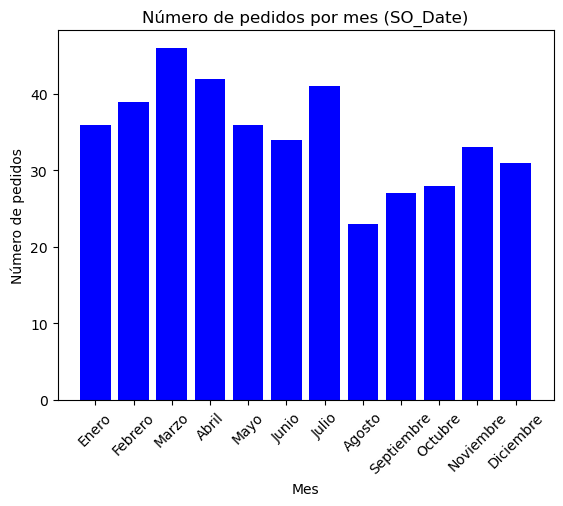

In [25]:
# Gráfico de barras del número de pedidos por mes
plt.bar(orders_per_month.index, orders_per_month.values, color='blue')
plt.title('Número de pedidos por mes (SO_Date)')
plt.xlabel('Mes')
plt.ylabel('Número de pedidos')
plt.xticks(rotation=45)
plt.show()

Meses que se esperan más recepciones

In [26]:
# Asegurarse de que la columna SO_EstDate esté en formato datetime
sales_order['SO_EstDate'] = pd.to_datetime(sales_order['SO_EstDate'])

# Extraer el mes de la columna SO_EstDate
sales_order['Est_Month'] = sales_order['SO_EstDate'].dt.month

# Contar el número de recepciones esperadas por mes
receipts_per_month = sales_order['Est_Month'].value_counts().sort_index()

# Reemplazar los números de los meses por sus nombres en el valor numérico
receipts_per_month.index = receipts_per_month.index.map(lambda x: month_names[x-1])

# Mostrar los valores numéricos de recepciones esperadas por mes
print("\nNúmero de recepciones esperadas por mes:")
print(receipts_per_month)


Número de recepciones esperadas por mes:
Enero         24
Febrero       27
Marzo         45
Abril         46
Mayo          36
Junio         42
Julio         41
Agosto        27
Septiembre    30
Octubre       29
Noviembre     36
Diciembre     33
Name: Est_Month, dtype: int64


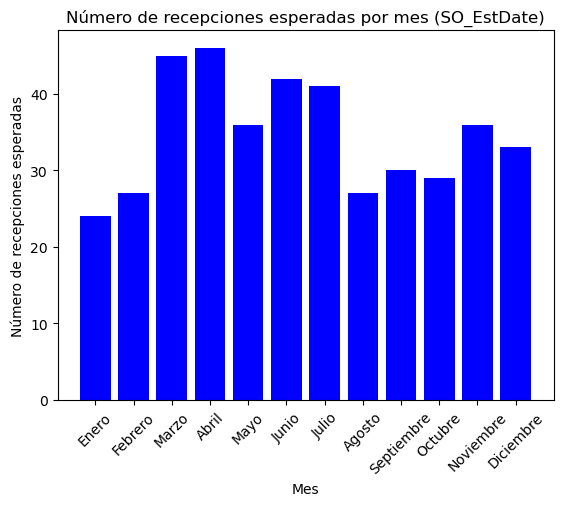

In [28]:
# Gráfico de barras del número de recepciones esperadas por mes
plt.bar(receipts_per_month.index, receipts_per_month.values, color='blue')
plt.title('Número de recepciones esperadas por mes (SO_EstDate)')
plt.xlabel('Mes')
plt.ylabel('Número de recepciones esperadas')
plt.xticks(rotation=45)
plt.show()